# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import requests

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Part 1 - Personal Finance Planner

In [5]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Concatenate url and api key
btc_url = btc_url + alpaca_api_key
eth_url = eth_url + alpaca_api_key

In [7]:
# Fetch current BTC
btc_df = requests.get(btc_url)

# Fetch current ETH
eth_df = requests.get(eth_url)

# Confirm data was fetched
btc_df, eth_df

(<Response [200]>, <Response [200]>)

### Compute current value of my crpto

In [8]:
# Convert btc_df to JSON
btc_data=btc_df.json()

# View btc_data using the "dumps" in the "json" function
print(json.dumps(btc_data,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18472425,
            "total_supply": 18472425,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11264.49,
                    "volume_24h": 21622265588,
                    "market_cap": 208157372876,
                    "percentage_change_1h": 0.0487475585357374,
                    "percentage_change_24h": -2.13423998030026,
                    "percentage_change_7d": -3.99535029047154,
                    "percent_change_1h": 0.0487475585357374,
                    "percent_change_24h": -2.13423998030026,
                    "percent_change_7d": -3.99535029047154
                }
            },
            "last_updated": 1598561900
        }
    },
    "metadata": {
        "timestamp": 1598561900,
        "num_

In [9]:
# Convert eth_df to JSON
eth_data=eth_df.json()

# View eth_data using the "dumps" in the "json" function
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 112357653,
            "total_supply": 112357653,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 379.61,
                    "volume_24h": 9997410156,
                    "market_cap": 42659159911,
                    "percentage_change_1h": 0.411671873241944,
                    "percentage_change_24h": -2.53090692215497,
                    "percentage_change_7d": -6.63175605341067,
                    "percent_change_1h": 0.411671873241944,
                    "percent_change_24h": -2.53090692215497,
                    "percent_change_7d": -6.63175605341067
                }
            },
            "last_updated": 1598561968
        }
    },
    "metadata": {
        "timestamp": 1598561968,
        "num_cry

In [10]:
# Fetch current BTC price
btc_price=btc_data['data']['1']['quotes']['USD']['price']
print(btc_price)

11264.49


In [11]:
# Fetch current ETH price
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

379.61


In [12]:
# Compute current value of my crpto
my_btc_value = (my_btc*btc_price)
my_eth_value = (my_eth*eth_price)

# Sum the values of the crypto wallet
sum_crypto_value = my_btc_value + my_eth_value
sum_crypto_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}.")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}.")
print(f"The sum of ETH and BTC is ${sum_crypto_value:0.2f}.")

The current value of your 1.2 BTC is $13517.39.
The current value of your 5.3 ETH is $2011.93.
The sum of ETH and BTC is $15529.32.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-27", tz="America/Chicago").isoformat()
today

'2020-08-27T00:00:00-05:00'

In [15]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
close_price_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Display data
close_price_df

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2020-08-27 00:00:00-04:00  118.55  118.56  117.95  117.97  10931474  348.51   

                                                             
                            high     low   close     volume  
time                                                         
2020-08-27 00:00:00-04:00  349.9  346.53  348.29  103934256

In [16]:
# Pick AGG and SPY close prices
agg_cp = float(close_price_df["AGG"]["close"])
spy_cp = float(close_price_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_cp}")
print(f"Current SPY closing price: ${spy_cp}")

Current AGG closing price: $117.97
Current SPY closing price: $348.29


In [17]:
# Set current amount of shares data
shares_data = {"shares": [my_agg, my_spy]}

# Set the tickers as a list
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
shares_df = pd.DataFrame(shares_data, index=tickers)

# Display shares data
shares_df

,shares
AGG,200
SPY,50


In [19]:
# Compute the current value of shares
agg_value = agg_cp * shares_df.loc["AGG"]["shares"]
spy_value = spy_cp * shares_df.loc["SPY"]["shares"]

# Sum current value of total stocks portfolio
sum_shares_value = agg_value + spy_value
sum_shares_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}.")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}.")
print(f"The sum of the SPY and AGG values are ${sum_shares_value:0.2f}.")

The current value of your 50 SPY shares is $17414.50.
The current value of your 200 AGG shares is $23594.00.
The sum of the SPY and AGG values are $41008.50.


### Savings Health Analysis

In [20]:
# Create savings DataFrame
df_assets= {
    "Amount" : [sum_crypto_value,sum_shares_value]}

# Set the index
assets = ["Crypto Wallet", "Stock Shares"]

# Create the shares DataFrame
df_assets = pd.DataFrame(df_assets, index=assets)

# Create the asset value DataFrame
df_savings = pd.DataFrame(df_assets)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto Wallet,15529.321
Stock Shares,41008.500


<AxesSubplot:title={'center':'Savings asset composition'}, ylabel='Amount'>

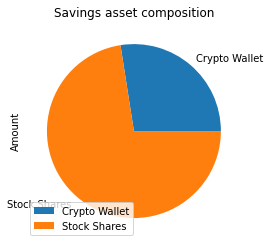

In [21]:
# Plot the savings pie chart
df_savings.plot.pie(y="Amount", title="Savings asset composition")

In [22]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3
print(f"The ideal emergency fund is set to three times the monthly income, and you have ${emergency_fund:0.2f}.")

The ideal emergency fund is set to three times the monthly income, and you have $36000.00.


In [23]:
# Calculate total amount of savings
total_savings = sum_crypto_value + sum_shares_value
print(f"The current value of the crypto assets and stock assets is ${total_savings:0.2f}.")

The current value of the crypto assets and stock assets is $56537.82.


In [24]:
# Calculate difference between total_savings and emergency fund
health_savings = total_savings - emergency_fund
health_savings

20537.820999999996

In [25]:
# Validate savings health
# Compare total savings to emergency fund
if total_savings >= emergency_fund:
    print("Congratulations, you have enough money an emergency fund.")
    print("Congratulations on reaching your financial goal.")
elif total_savings < emergency_fund: 
     print(f"You are ${(health_savings*-1):0.2f} away from reaching the goal of saving three times of your monthly expenses.")

Congratulations, you have enough money an emergency fund.
Congratulations on reaching your financial goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2020-08-27", tz="America/Chicago").isoformat()
end_date = pd.Timestamp("2015-08-27", tz="America/Chicago").isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665.0   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866.0   
2015-08-31 00:00:00-04:00  109.28  109.370  108.90  108.920  3866305.0   
2015-09-01 00:00:00-04:00  108.83  109.110  108.77  109.010  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.050  108.81  108.900  3273302.0   

                              SPY                                      
                             open     high     low   close     volume  
time                                                                   
2015-08-27 00:00:00-04:00  197.02  199.410  195.21  199.28  226847229  
2015-08-28 00:00:00-04:00  198.50  199.835  197.92  199.28  111959716  
2015-08-31 00:00:00-04:00  198.11  199.125  197.01  197.60  108023599  
2015-09-01 00:00:00-04:00  193.12  194.770  190.73  191.61  173963880  
2015-09-02 00:00:00-04:00  194.65  195.460  192.42  195.46  120044919

In [33]:
# Get previous 5 year of prices
end_date = pd.Timestamp.now(tz="America/Chicago")
start_date = (end_date - pd.DateOffset(years=5)).isoformat()
print(f"Starting on {start_date}, \n"
      f"and ending on {end_date}.")

Starting on 2015-08-27T16:10:21.354658-05:00, 
and ending on 2020-08-27 16:10:21.354658-05:00.


In [38]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_weight = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_weight.portfolio_data.tail()

AGG                                         \
                             open      high      low   close      volume   
time                                                                       
2020-08-21 00:00:00-04:00  118.74  118.7600  118.550  118.69   9369852.0   
2020-08-24 00:00:00-04:00  118.72  118.8200  118.600  118.62   8887200.0   
2020-08-25 00:00:00-04:00  118.35  118.4600  118.182  118.39   7179314.0   
2020-08-26 00:00:00-04:00  118.35  118.4199  118.210  118.36   9825986.0   
2020-08-27 00:00:00-04:00  118.55  118.5600  117.950  117.97  10931474.0   

                                           SPY                              \
                          daily_return    open    high       low     close   
time                                                                         
2020-08-21 00:00:00-04:00     0.001012  337.92  339.72  337.5500  339.4400   
2020-08-24 00:00:00-04:00    -0.000590  342.12  343.00  339.4504  342.9400   
2020-08-25 00:00:00-04:00    -0.001939  343.53  344.21  342.2700  344.0999   
2020-08-26 00:00:00-04:00    -0.000253  344.76  347.86  344.1700  347.5600   
2020-08-27 00:00:00-04:00    -0.003295  348.51  349.90  346.5300  348.2900   

                                                   
                              volume daily_return  
time                                               
2020-08-21 00:00:00-04:00   85164214     0.003518  
2020-08-24 00:00:00-04:00   79073131     0.010311  
2020-08-25 00:00:00-04:00   64468899     0.003382  
2020-08-26 00:00:00-04:00   87596268     0.010056  
2020-08-27 00:00:00-04:00  103934256     0.002100

In [39]:
# Run a Monte Carlo simulation to forecast 30 years cumulative returns
# Remember to restart kernel.  Changed setting in MCForecastTools.py
# from n%10 == to n%100, so print less simulations
MC_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011010,0.995481,0.991704,0.994013,0.999716,0.996608,0.999897,0.999952,0.994564,0.995810,...,0.982041,1.005966,1.006523,0.991069,1.004736,0.994201,1.008189,0.991519,1.000730,0.997823
2,1.010967,0.995299,0.986302,0.987466,1.006638,0.997249,0.994891,1.002776,1.007504,0.995788,...,0.982983,1.005325,1.001416,0.985876,0.993383,0.991163,1.003558,0.995408,1.006993,0.998688
3,1.018345,0.992712,0.981826,0.977401,1.005857,1.000965,1.005293,1.000298,1.002897,0.982480,...,0.988562,0.989778,1.019252,0.990675,1.003560,1.000586,0.997946,0.998189,1.000273,0.990584
4,1.013862,0.988657,0.979160,0.975031,0.999532,0.998018,0.987420,1.003265,1.001348,0.979630,...,0.995493,0.977081,1.014618,0.993044,1.009294,1.016832,0.998095,0.990651,0.987557,0.983571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.513725,4.274221,8.456372,10.176184,13.646657,26.443090,5.146620,3.320010,7.828414,10.622399,...,8.155593,15.056757,21.938248,4.473152,4.028710,11.663597,2.169049,13.452511,5.292494,9.841532
7557,5.506197,4.257731,8.503628,10.254686,13.383667,26.403022,5.208918,3.328793,7.843904,10.618568,...,8.189181,14.832758,22.330760,4.486765,4.020199,11.676737,2.182394,13.619149,5.265607,9.846913
7558,5.490688,4.226904,8.481702,10.255089,13.491069,26.639722,5.195237,3.318084,7.857091,10.465077,...,8.181830,15.018309,22.213760,4.474594,4.015391,11.680482,2.182929,13.770574,5.261836,9.860103
7559,5.513778,4.225543,8.375853,10.345792,13.519859,26.687734,5.209342,3.328423,7.773365,10.481959,...,8.184311,15.005533,22.330022,4.482970,4.034558,11.792224,2.165382,13.642894,5.256985,9.894194


In [40]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_weight.simulated_return.mean(axis=1)),
    "median": list(MC_weight.simulated_return.median(axis=1)),
    "min": list(MC_weight.simulated_return.min(axis=1)),
    "max": list(MC_weight.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.tail()

,mean,median,min,max
7556,12.733034,10.630667,1.316541,53.483387
7557,12.728306,10.678551,1.321425,53.462832
7558,12.724185,10.649706,1.328736,53.949025
7559,12.727902,10.668472,1.316438,54.028997
7560,12.727392,10.625765,1.327654,53.960593


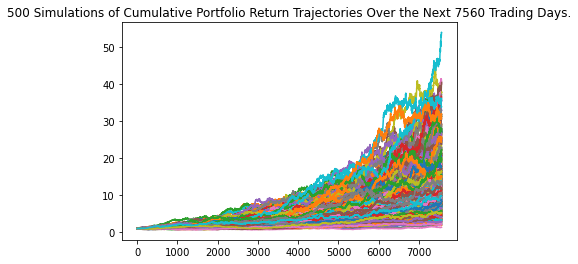

In [41]:
# Plot simulation outcomes
line_plot = MC_weight.plot_simulation()

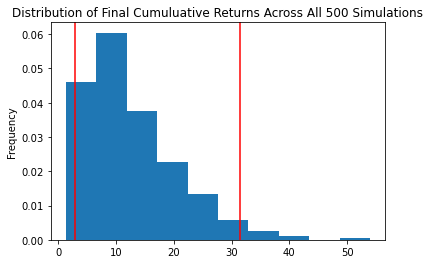

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_weight.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_weight.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.727392
std               7.866323
min               1.327654
25%               6.708682
50%              10.625765
75%              16.877561
max              53.960593
95% CI Lower      2.897140
95% CI Upper     31.511108
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57942.8 and $630222.16.


In [47]:
# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.tail()

,mean,median,min,max
7556,254660.687347,212613.346007,26330.821944,1.069668e+06
7557,254566.121087,213571.018470,26428.492955,1.069257e+06
7558,254483.696812,212994.123204,26574.723736,1.078980e+06
7559,254558.032835,213369.431663,26328.758173,1.080580e+06
7560,254547.837885,212515.291763,26553.073940,1.079212e+06


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [48]:
# Set initial investment
initial_investment_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
cumulative_pnl_increase = initial_investment * df_simulated_returns

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $57942.8 and $630222.16


# Optional Challenge - Early Retirement


## Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")